In [1]:
import scanpy as sc
import pandas as pd
import pickle
import time
import anndata
import sklearn.metrics
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
df= pd.read_table("matrix_simdata/random/sim_matrix2.csv", index_col=0,sep=",")
df

cell1  cell2  cell3  cell4  cell5  cell6  cell7  cell8  cell9  \
gene1         0      0      0      0      0      0      0      0      0   
gene2         0      0      0      0      0      0      0      0      0   
gene3         0      3      0      5      1      0      0      0      0   
gene4         0      5      0      0      0      0      0      0      0   
gene5         0      0      0      0      0      0      0      0      0   
...         ...    ...    ...    ...    ...    ...    ...    ...    ...   
gene996       0      0      0      0      0      0      0      0      0   
gene997       0      0      1      0      0      0      0      4      1   
gene998       0      4      5      4      0      1      0      0      1   
gene999       0      3      0      1      0      0      0      5      0   
gene1000      0      0      2      0      0      0      0      4      0   

          cell10  ...  cell4991  cell4992  cell4993  cell4994  cell4995  \
gene1          0  ...         0         0         0         0         1   
gene2          0  ...         0         0         0         0         0   
gene3          2  ...         0         4         0         0         1   
gene4          0  ...         0         0         0         0         0   
gene5          0  ...         0         0         0         0         0   
...          ...  ...       ...       ...       ...       ...       ...   
gene996        0  ...         0         0         0         0         0   
gene997        2  ...         0         0         0         0         0   
gene998        2  ...         1         0         1         2         1   
gene999        1  ...         0         0         0         0         4   
gene1000       0  ...         0         1         0         0         0   

          cell4996  cell4997  cell4998  cell4999  cell5000  
gene1            0         0         0         0         0  
gene2            0         0         0         0         0  
gene3            0         0         0         0         4  
gene4            0         0         0         0         0  
gene5            0         0         0         0         0  
...            ...       ...       ...       ...       ...  
gene996          0         0         0         0         0  
gene997          0         0         0         0         0  
gene998          7         1         3         0         4  
gene999          2         0         0         0         1  
gene1000         0         0         0         4         1  

[1000 rows x 5000 columns]

In [3]:
adata = anndata.AnnData(df.T)
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)

In [4]:
sc.pp.log1p(adata)
adata.raw = adata

In [5]:
sc.pp.highly_variable_genes(adata, min_mean=0.05, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var['highly_variable']]

In [6]:
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')

/home/morelli/anaconda3/envs/scrna_test/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:909: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


cell annotation

In [7]:
cell_annotation= pd.read_table('matrix_simdata/random/sim_celltag2.csv', sep=",", index_col=0)
cell_annotation

cluster_id  sample_id group_id
cell1         CD4 T cells  ctrl107.A        A
cell2     CD14+ Monocytes  ctrl101.A        A
cell3     CD14+ Monocytes  ctrl101.A        A
cell4     CD14+ Monocytes  ctrl101.A        A
cell5     CD14+ Monocytes  ctrl101.A        A
...                   ...        ...      ...
cell4996  CD14+ Monocytes  ctrl101.B        B
cell4997      CD4 T cells  ctrl101.A        A
cell4998      CD4 T cells  ctrl101.A        A
cell4999  CD14+ Monocytes  ctrl101.A        A
cell5000  CD14+ Monocytes  ctrl101.A        A

[5000 rows x 3 columns]

In [8]:
adata.obs.loc[:, "group_id"] = cell_annotation.loc[adata.obs_names, "group_id"]
adata.obs.loc[:, "cluster_id"] = cell_annotation.loc[adata.obs_names, "cluster_id"]
adata.obs.loc[:, "sample_id"] = cell_annotation.loc[adata.obs_names, "sample_id"]

In [9]:
adata.write('mi_simdata/adata_base2.h5ad')

... storing 'group_id' as categorical
... storing 'cluster_id' as categorical
... storing 'sample_id' as categorical


In [10]:
adata=sc.read('mi_simdata/adata_base2.h5ad')

In [11]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

In [12]:
adata.write('mi_simdata/adata10test2.h5ad')

In [13]:
adata10test=sc.read('mi_simdata/adata10test2.h5ad')

In [14]:
nei=[5,10,20,50,100]
adatone=[]
for x in nei:
    adata=sc.read('mi_simdata/adata_base.h5ad')
    sc.pp.neighbors(adata, n_neighbors=x, n_pcs=40)
    adatone.append(adata)
adatone[0].write('mi_simdata/adata_5.h5ad')
adatone[1].write('mi_simdata/adata_10.h5ad')
adatone[2].write('mi_simdata/adata_20.h5ad')
adatone[3].write('mi_simdata/adata_50.h5ad')
adatone[4].write('mi_simdata/adata_100.h5ad')

In [15]:
adata5=sc.read('mi_simdata/adata_5.h5ad')
adata10=sc.read('mi_simdata/adata_10.h5ad')
adata20=sc.read('mi_simdata/adata_20.h5ad')
adata50=sc.read('mi_simdata/adata_50.h5ad')
adata100=sc.read('mi_simdata/adata_100.h5ad')

# 1) nsbm
### 1a) nsbm unweighted

In [95]:
adata5=sc.read('mi_simdata/adata_5.h5ad')
adata10=sc.read('mi_simdata/adata_10.h5ad')
adata20=sc.read('mi_simdata/adata_20.h5ad')
adata50=sc.read('mi_simdata/adata_50.h5ad')
adata100=sc.read('mi_simdata/adata_100.h5ad')

In [80]:
sc.tl.nsbm(adata5)
adata5.write('mi_simdata/adata_5_unweighted.h5ad')

In [81]:
unw_adata5=sc.read('mi_simdata/adata_5_unweighted.h5ad')

In [83]:
sc.tl.nsbm(adata10)
adata10.write('mi_simdata/adata_10_unweighted.h5ad')

In [84]:
unw_adata10=sc.read('mi_simdata/adata_10_unweighted.h5ad')

In [65]:
a=time.time()
sc.tl.nsbm(adata5)
b=time.time()
sc.tl.nsbm(adata10)
c=time.time()
sc.tl.nsbm(adata20)
d=time.time()
sc.tl.nsbm(adata50)
e=time.time()
sc.tl.nsbm(adata100)
f=time.time()
aa=b-a
bb=c-b
cc=d-c
dd=e-d
ee=f-e
print(aa,bb,cc,dd,ee)
adata5.write('mi_simdata/adata_5_unweighted.h5ad')
adata10.write('mi_simdata/adata_10_unweighted.h5ad')
adata20.write('mi_simdata/adata_20_unweighted.h5ad')
adata50.write('mi_simdata/adata_50_unweighted.h5ad')
adata100.write('mi_simdata/adata_100_unweighted.h5ad')

150.99706935882568 172.50941562652588 315.53557109832764 244.72948575019836 371.7797861099243


In [66]:
unw_adata5=sc.read('mi_simdata/adata_5_unweighted.h5ad')
unw_adata10=sc.read('mi_simdata/adata_10_unweighted.h5ad')
unw_adata20=sc.read('mi_simdata/adata_20_unweighted.h5ad')
unw_adata50=sc.read('mi_simdata/adata_50_unweighted.h5ad')
unw_adata100=sc.read('mi_simdata/adata_100_unweighted.h5ad')

### 1b) nsbm weighted

In [ ]:
adata5=sc.read('mi_simdata/adata_5.h5ad')
adata10=sc.read('mi_simdata/adata_10.h5ad')
adata20=sc.read('mi_simdata/adata_20.h5ad')
adata50=sc.read('mi_simdata/adata_50.h5ad')
adata100=sc.read('mi_simdata/adata_100.h5ad')

In [ ]:
a=time.time()
sc.tl.nsbm(adata5, use_weights=True)
b=time.time()
sc.tl.nsbm(adata10, use_weights=True)
c=time.time()
sc.tl.nsbm(adata20,use_weights=True)
d=time.time()
sc.tl.nsbm(adata50, use_weights=True)
e=time.time()
sc.tl.nsbm(adata100,  use_weights=True)
f=time.time()
aa=b-a
bb=c-b
cc=d-c
dd=e-d
ee=f-e
print(aa,bb,cc,dd,ee)
adata5.write('mi_simdata/adata_5_weighted.h5ad')
adata10.write('mi_simdata/adata_10_weighted.h5ad')
adata20.write('mi_simdata/adata_20_weighted.h5ad')
adata50.write('mi_simdata/adata_50_weighted.h5ad')
adata100.write('mi_simdata/adata_100_weighted.h5ad')

In [ ]:
w_adata5=sc.read('mi_simdata/adata_5_weighted.h5ad')
w_adata10=sc.read('mi_simdata/adata_10_weighted.h5ad')
w_adata20=sc.read('mi_simdata/adata_20_weighted.h5ad')
w_adata50=sc.read('mi_simdata/adata_50_weighted.h5ad')
w_adata100=sc.read('mi_simdata/adata_100_weighted.h5ad')

# 2) Representation
### 2a) unweighted

In [14]:
#p_dd=1,3,5
c=time.time()
sc.tl.nsbm(adata10test, collect_marginals=False)
b=time.time()
a=b-c
print(a)
adata10test.write('mi_simdata/adata_10_unweighted.h5ad')

/usr/lib/python3/dist-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/usr/lib/python3/dist-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/usr/lib/python3/dist-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/usr/lib/python3/dist-packages/graph_tool/all.py:40: RuntimeWarning: Error importing draw module, proceeding nevertheless: /usr/lib/python3/dist-packages/cairo/_cairo.cpython-37m-x86_64-linux-gnu.so: undefined symbol: cairo_tee_surface_index
  warnings.warn(msg, RuntimeWarning)


1191.0178866386414


In [ ]:
#p_dd=1,2,3
c=time.time()
sc.tl.nsbm(adata10test, collect_marginals=False)
b=time.time()
a=b-c
print(a)
adata10test.write('mi_simdata/adata_10_unweighted2.h5ad')

In [ ]:
#p_dd=2,2,2
c=time.time()
sc.tl.nsbm(adata10test, collect_marginals=False)
b=time.time()
a=b-c
print(a)
adata10test.write('mi_simdata/adata_10_unweighted3.h5ad')

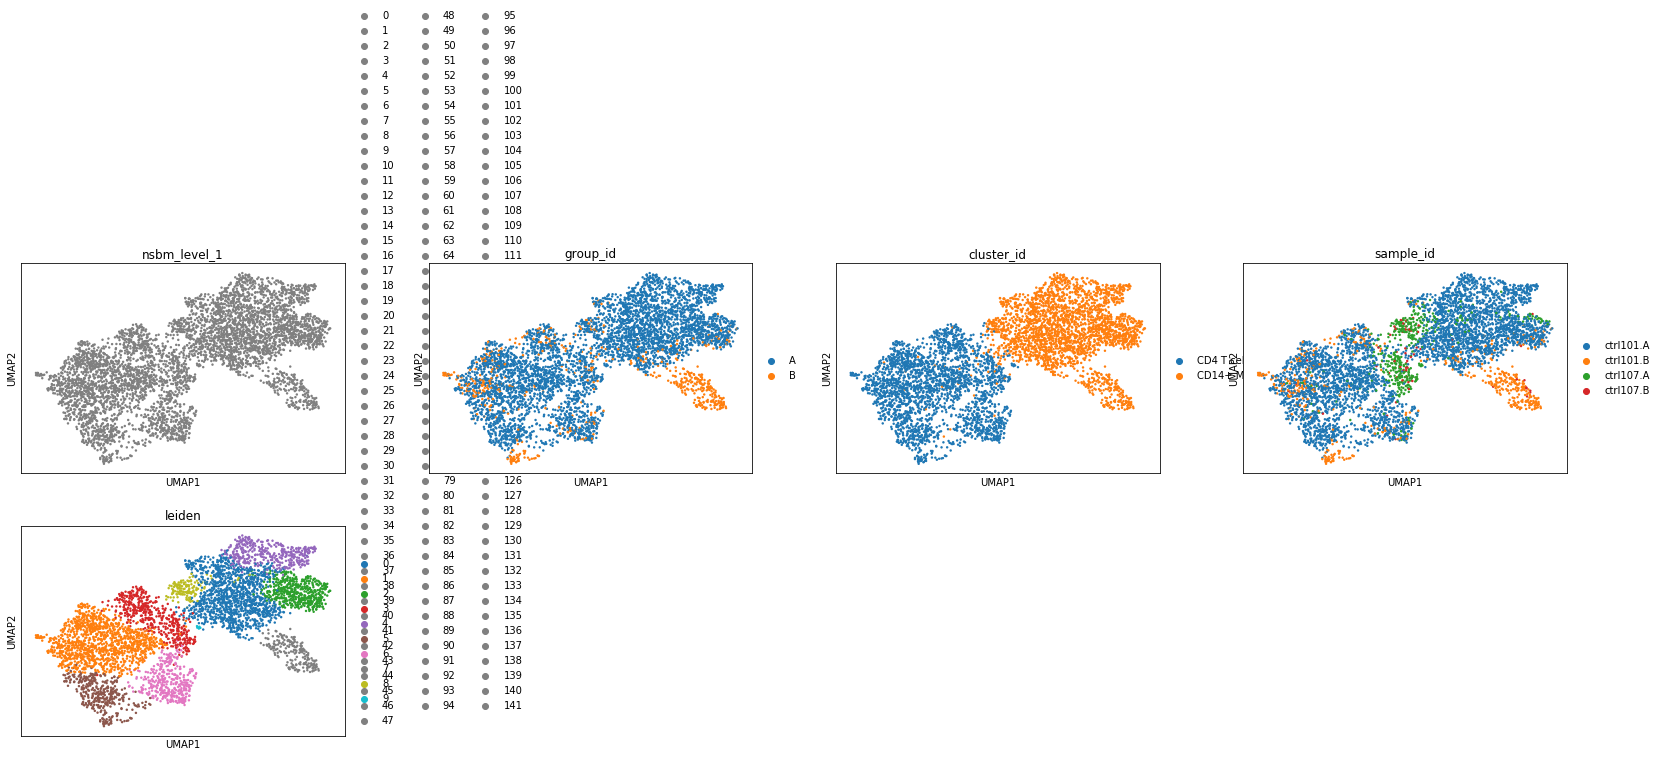

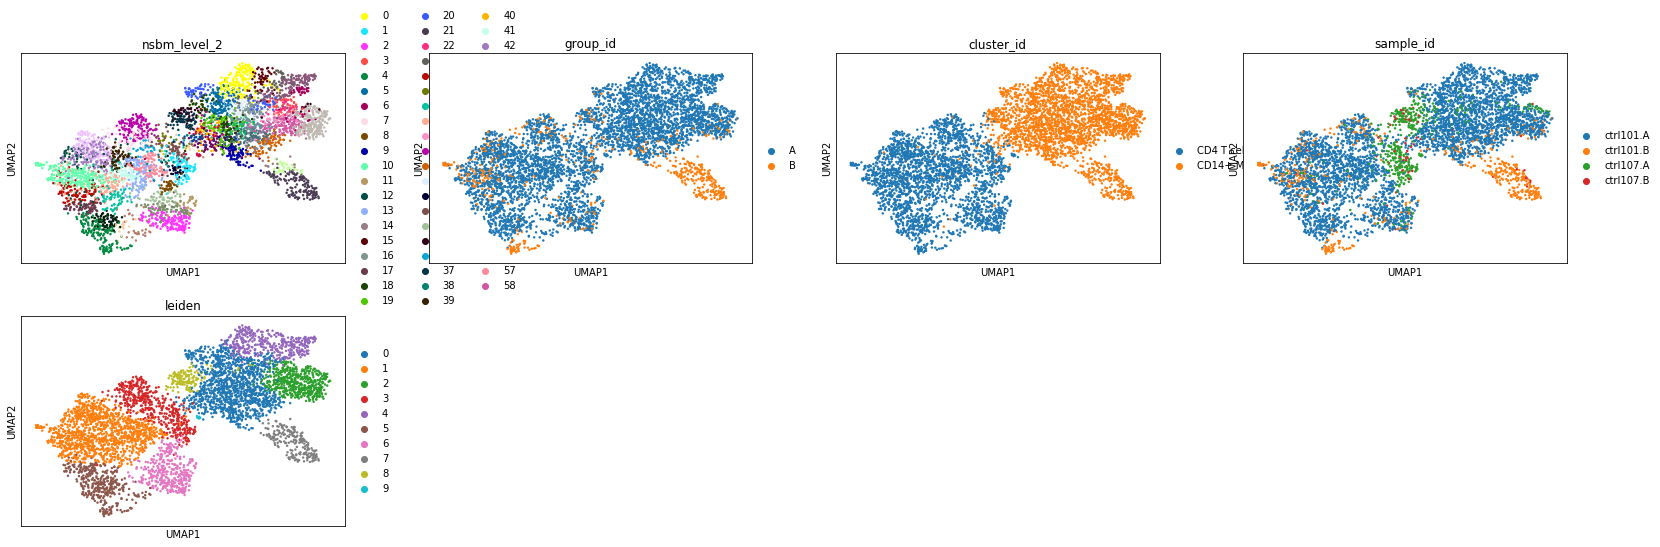

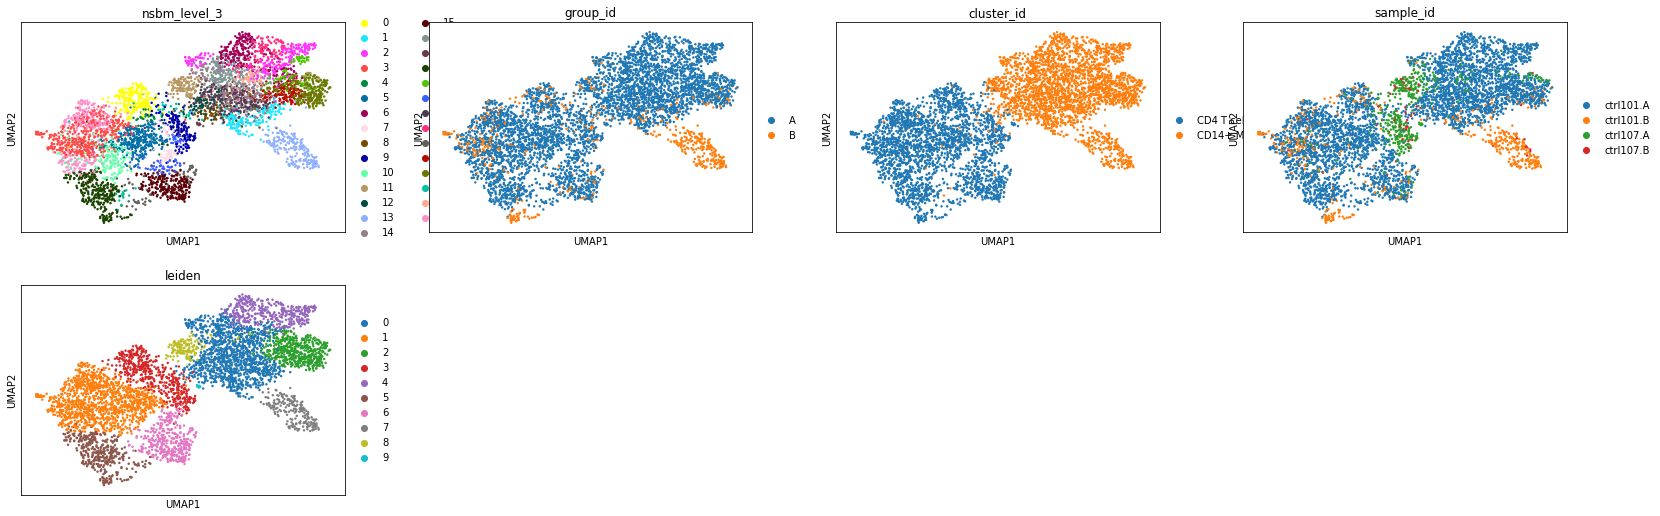

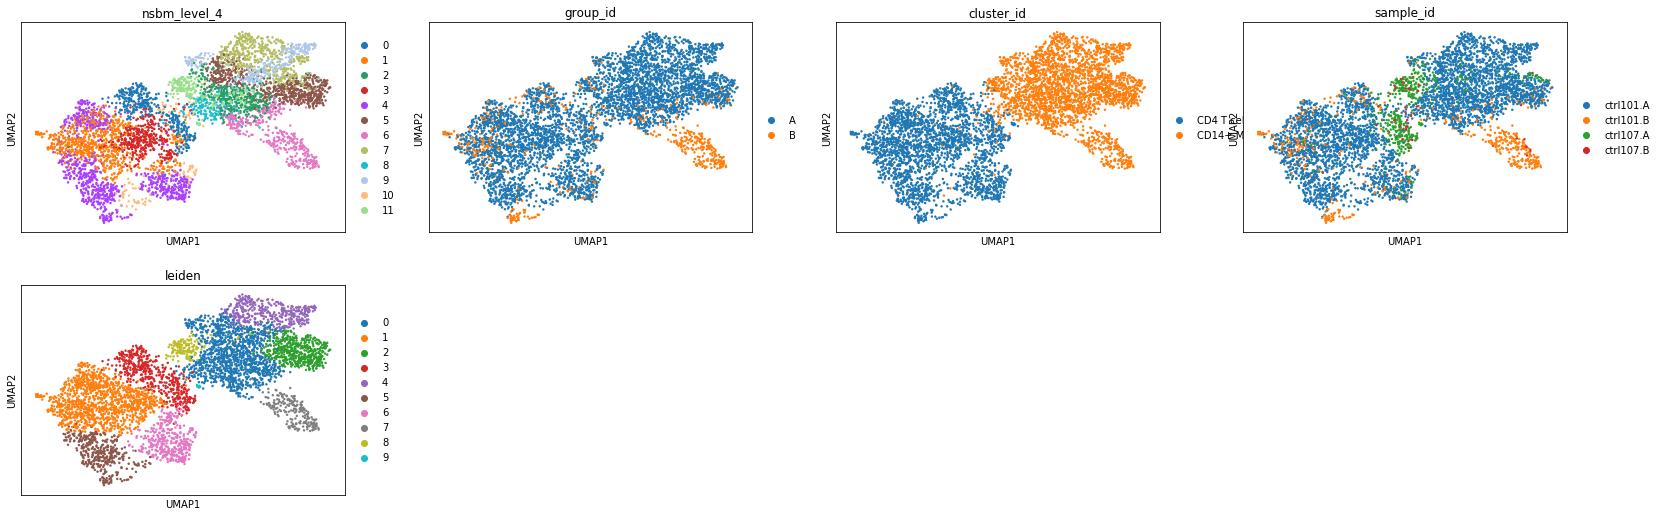

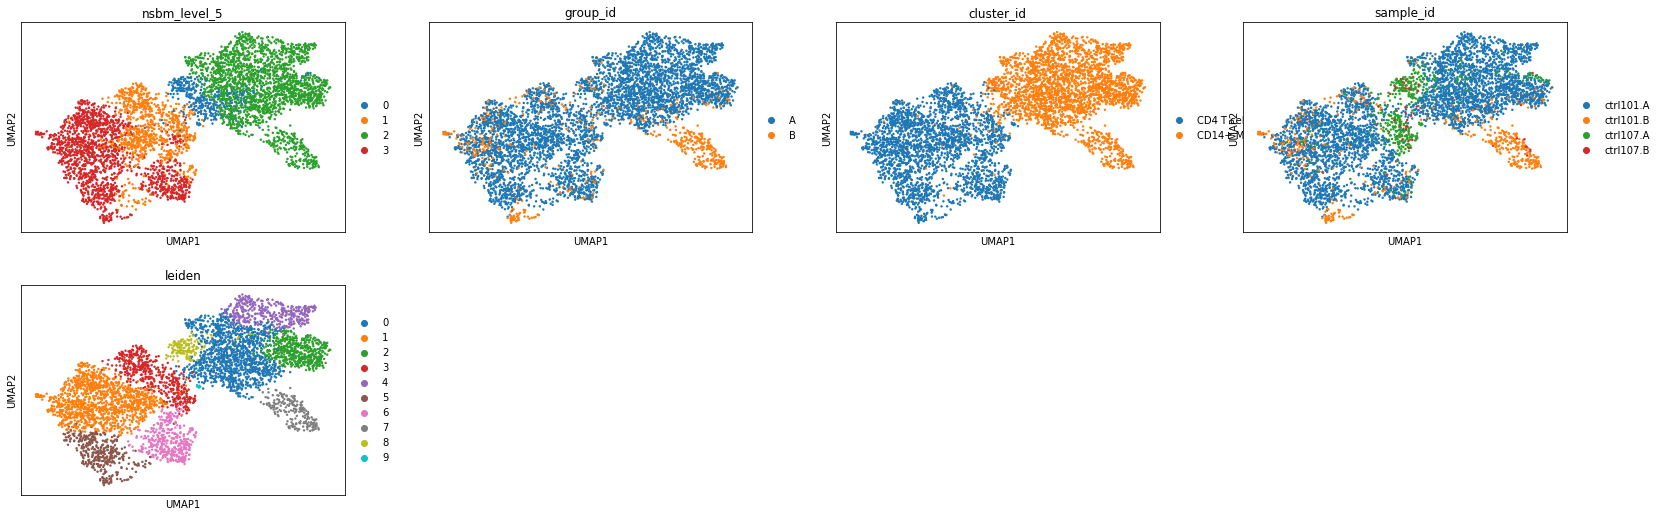

In [17]:
sc.tl.umap(adata10test)
sc.tl.leiden(adata10test, resolution=0.47)
sc.pl.umap(adata10test, color=['nsbm_level_1','group_id','cluster_id','sample_id','leiden'])
sc.pl.umap(adata10test, color=['nsbm_level_2','group_id','cluster_id','sample_id','leiden'])
sc.pl.umap(adata10test, color=['nsbm_level_3','group_id','cluster_id','sample_id','leiden'])
sc.pl.umap(adata10test, color=['nsbm_level_4','group_id','cluster_id','sample_id','leiden'])
sc.pl.umap(adata10test, color=['nsbm_level_5','group_id','cluster_id','sample_id','leiden'])

In [ ]:
sc.tl.umap(adata10test)
sc.tl.leiden(adata10test, resolution=0.07)
sc.pl.umap(adata10test, color=['nsbm_level_1','group_id','cluster_id','sample_id','leiden'])
sc.pl.umap(adata10test, color=['nsbm_level_2','group_id','cluster_id','sample_id','leiden'])
sc.pl.umap(adata10test, color=['nsbm_level_3','group_id','cluster_id','sample_id','leiden'])
sc.pl.umap(adata10test, color=['nsbm_level_4','group_id','cluster_id','sample_id','leiden'])
sc.pl.umap(adata10test, color=['nsbm_level_5','group_id','cluster_id','sample_id','leiden'])

In [ ]:
sc.tl.umap(adata10test)
sc.tl.leiden(adata10test, resolution=0.07)
sc.pl.umap(adata10test, color=['nsbm_level_1','group_id','cluster_id','sample_id','leiden'])
sc.pl.umap(adata10test, color=['nsbm_level_2','group_id','cluster_id','sample_id','leiden'])
sc.pl.umap(adata10test, color=['nsbm_level_3','group_id','cluster_id','sample_id','leiden'])
sc.pl.umap(adata10test, color=['nsbm_level_4','group_id','cluster_id','sample_id','leiden'])
sc.pl.umap(adata10test, color=['nsbm_level_5','group_id','cluster_id','sample_id','leiden'])

<IPython.core.display.Javascript object>


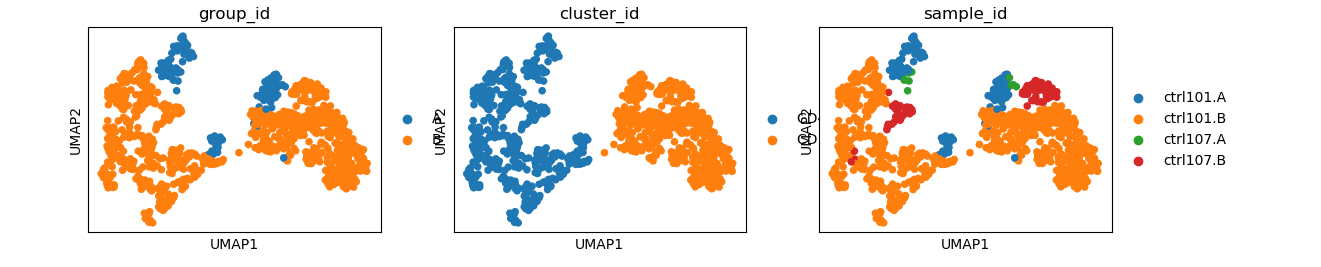

In [99]:
sc.tl.umap(adata10)
sc.pl.umap(adata10, color=['group_id','cluster_id','sample_id'])

<IPython.core.display.Javascript object>


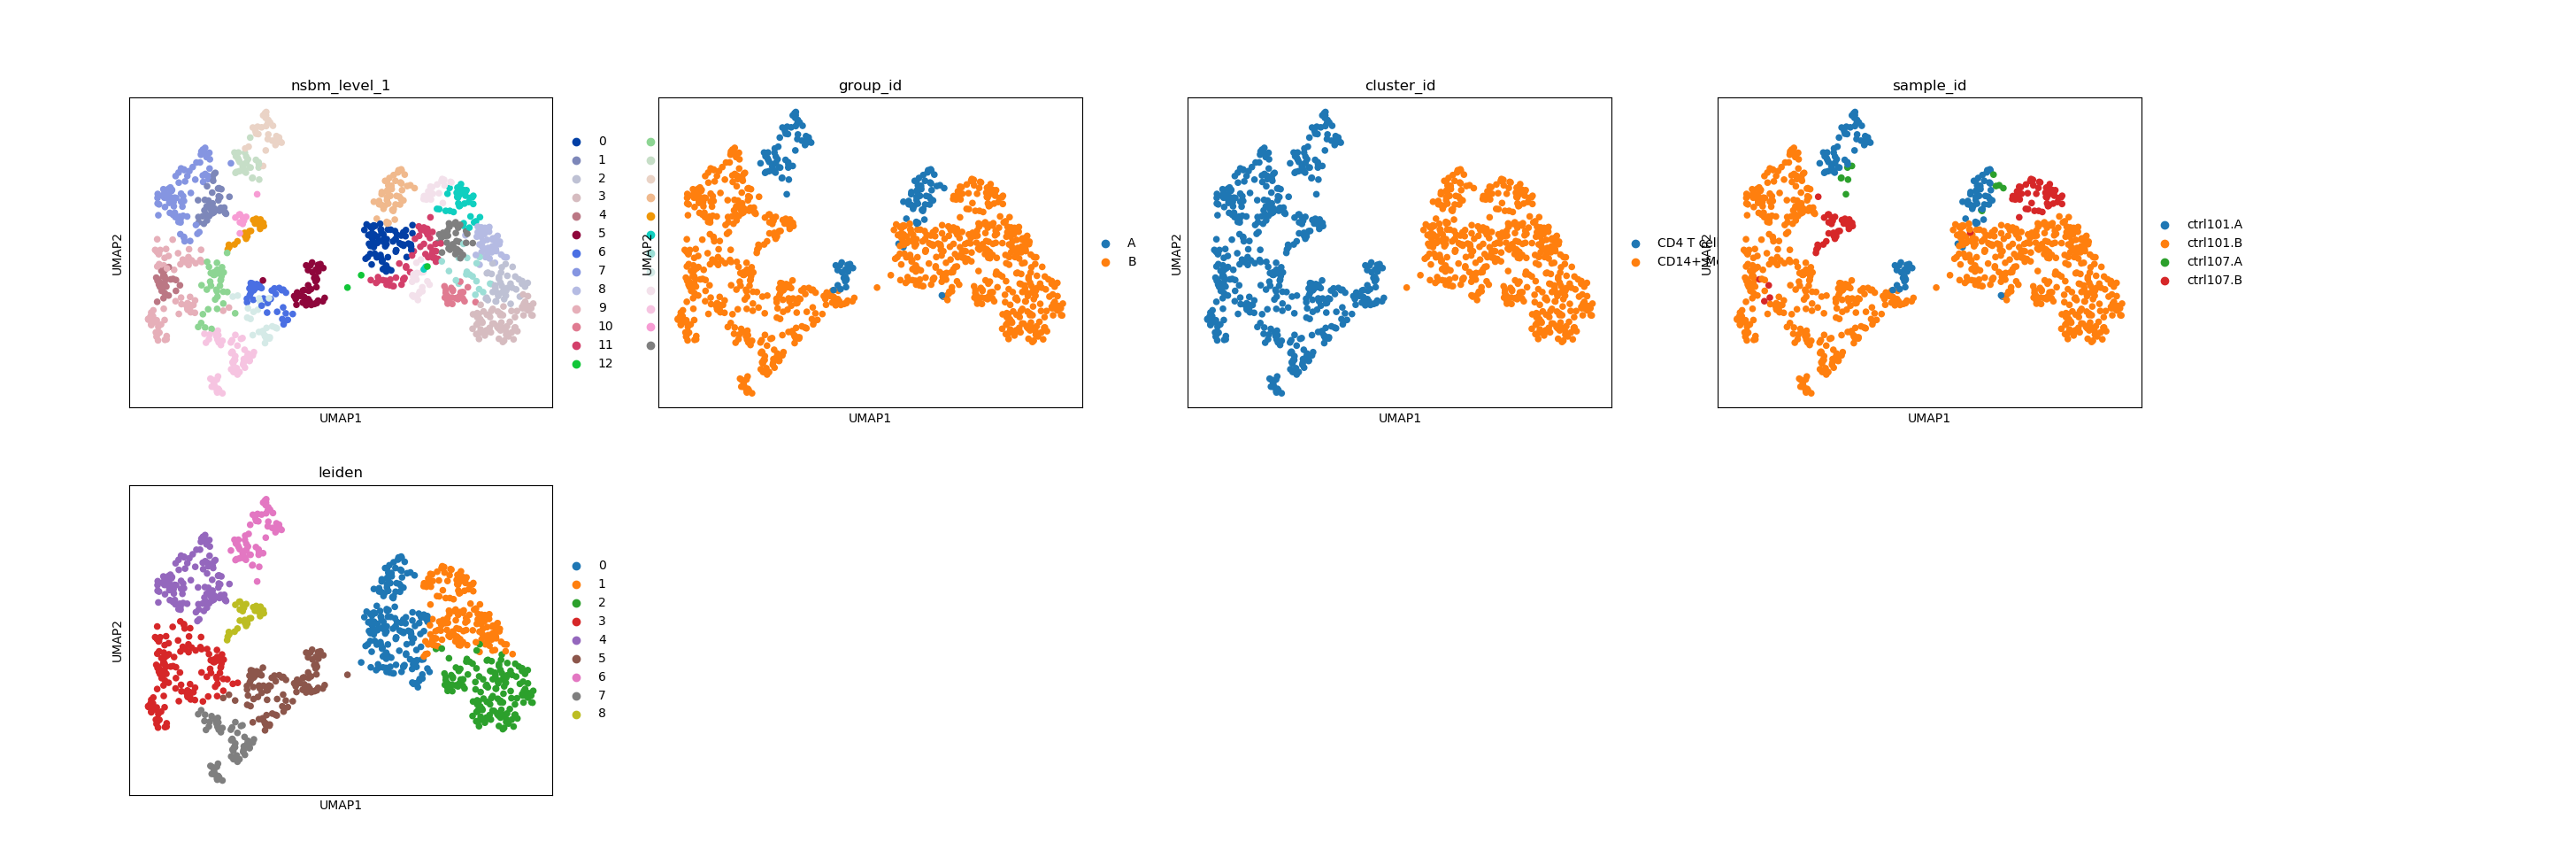

<IPython.core.display.Javascript object>


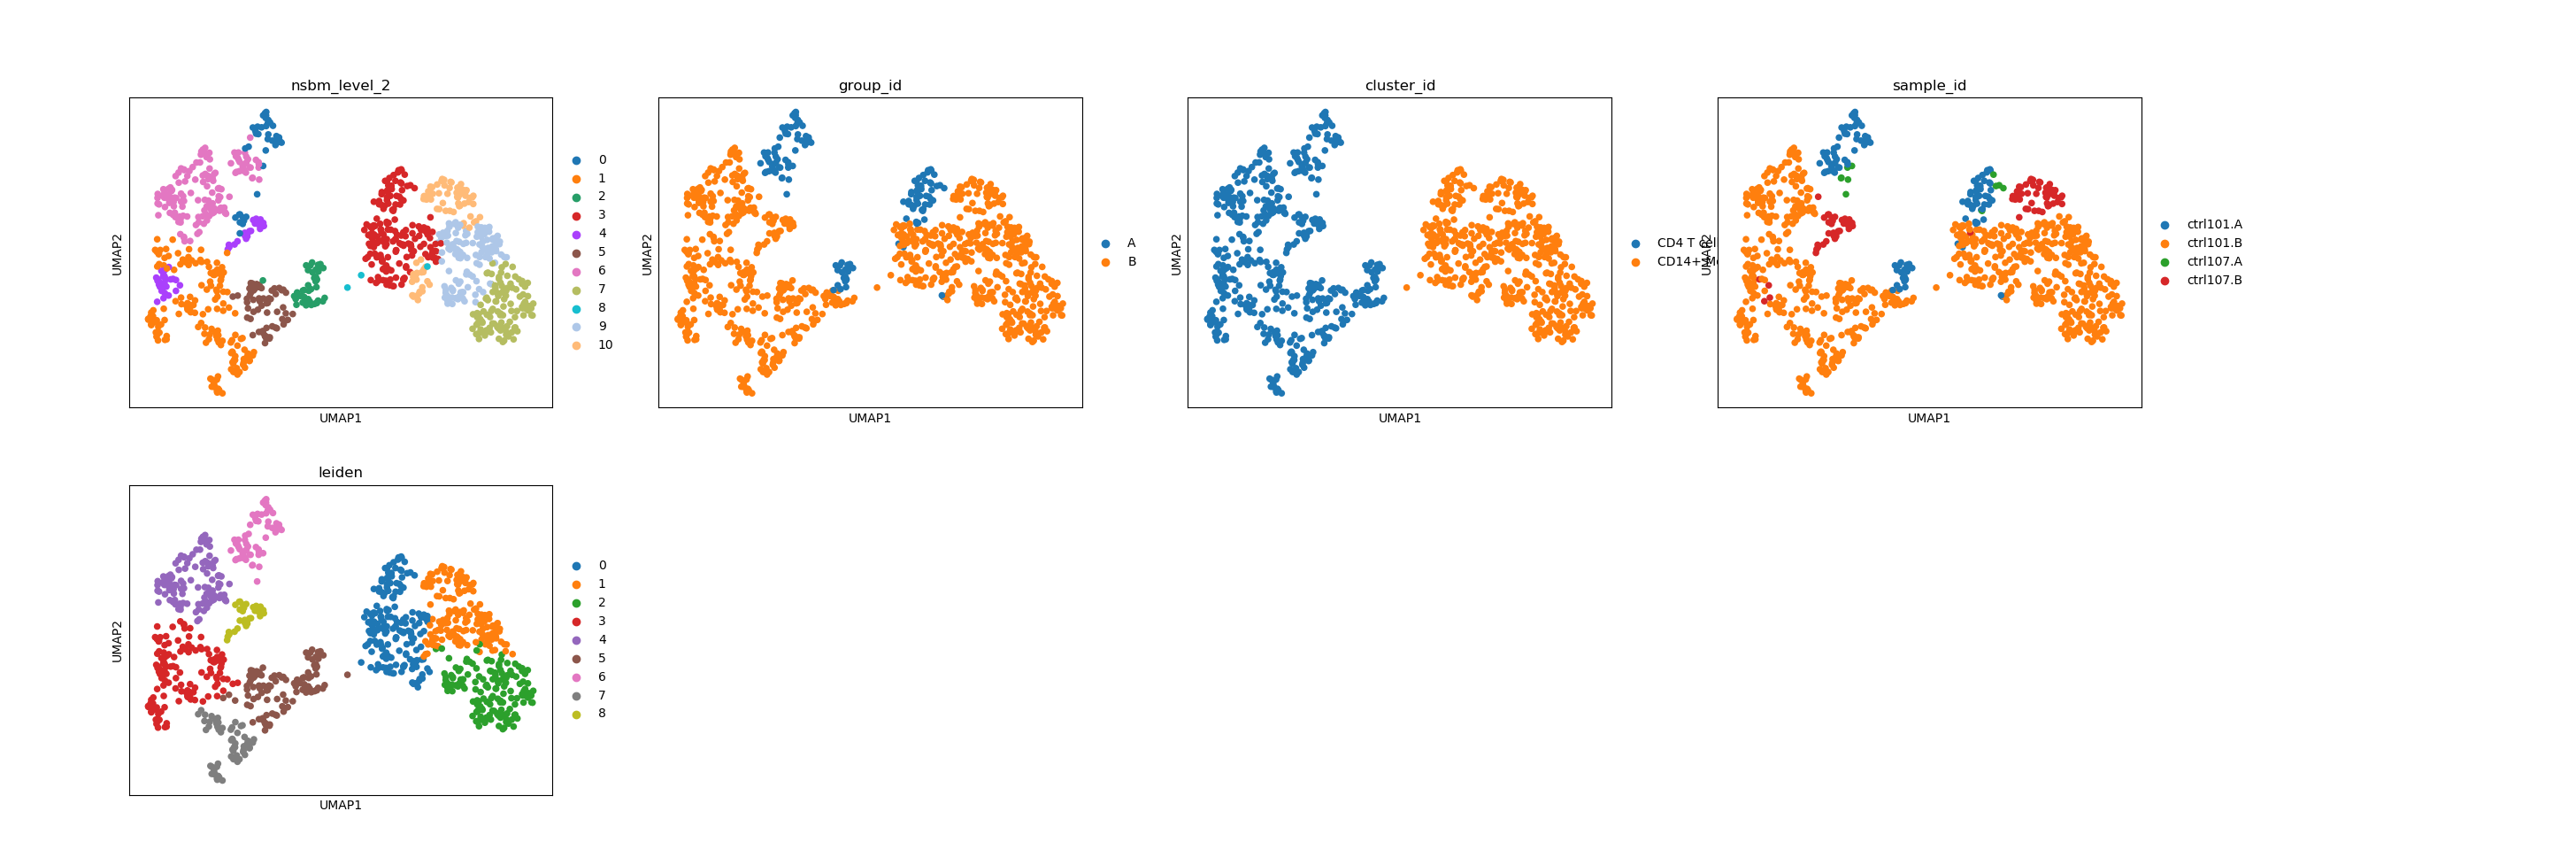

<IPython.core.display.Javascript object>


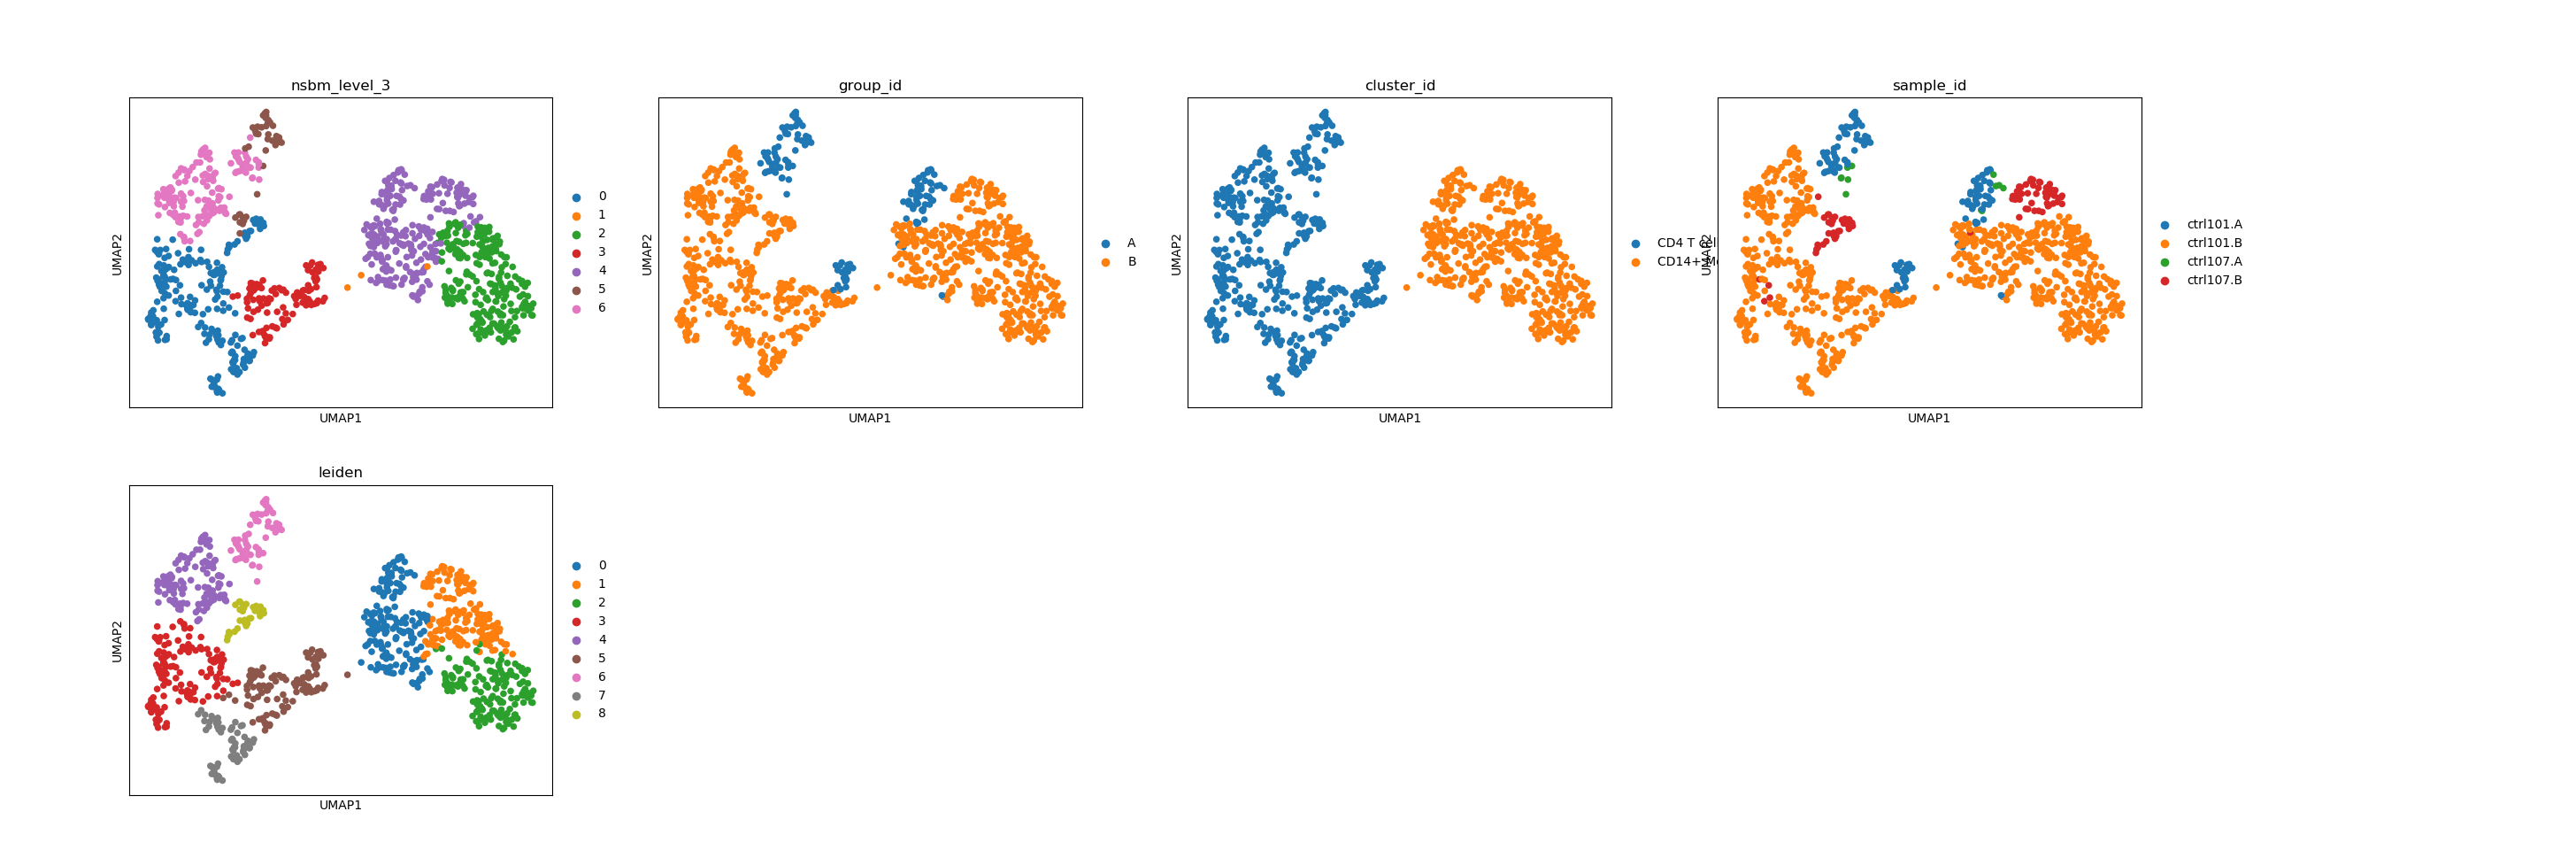

<IPython.core.display.Javascript object>


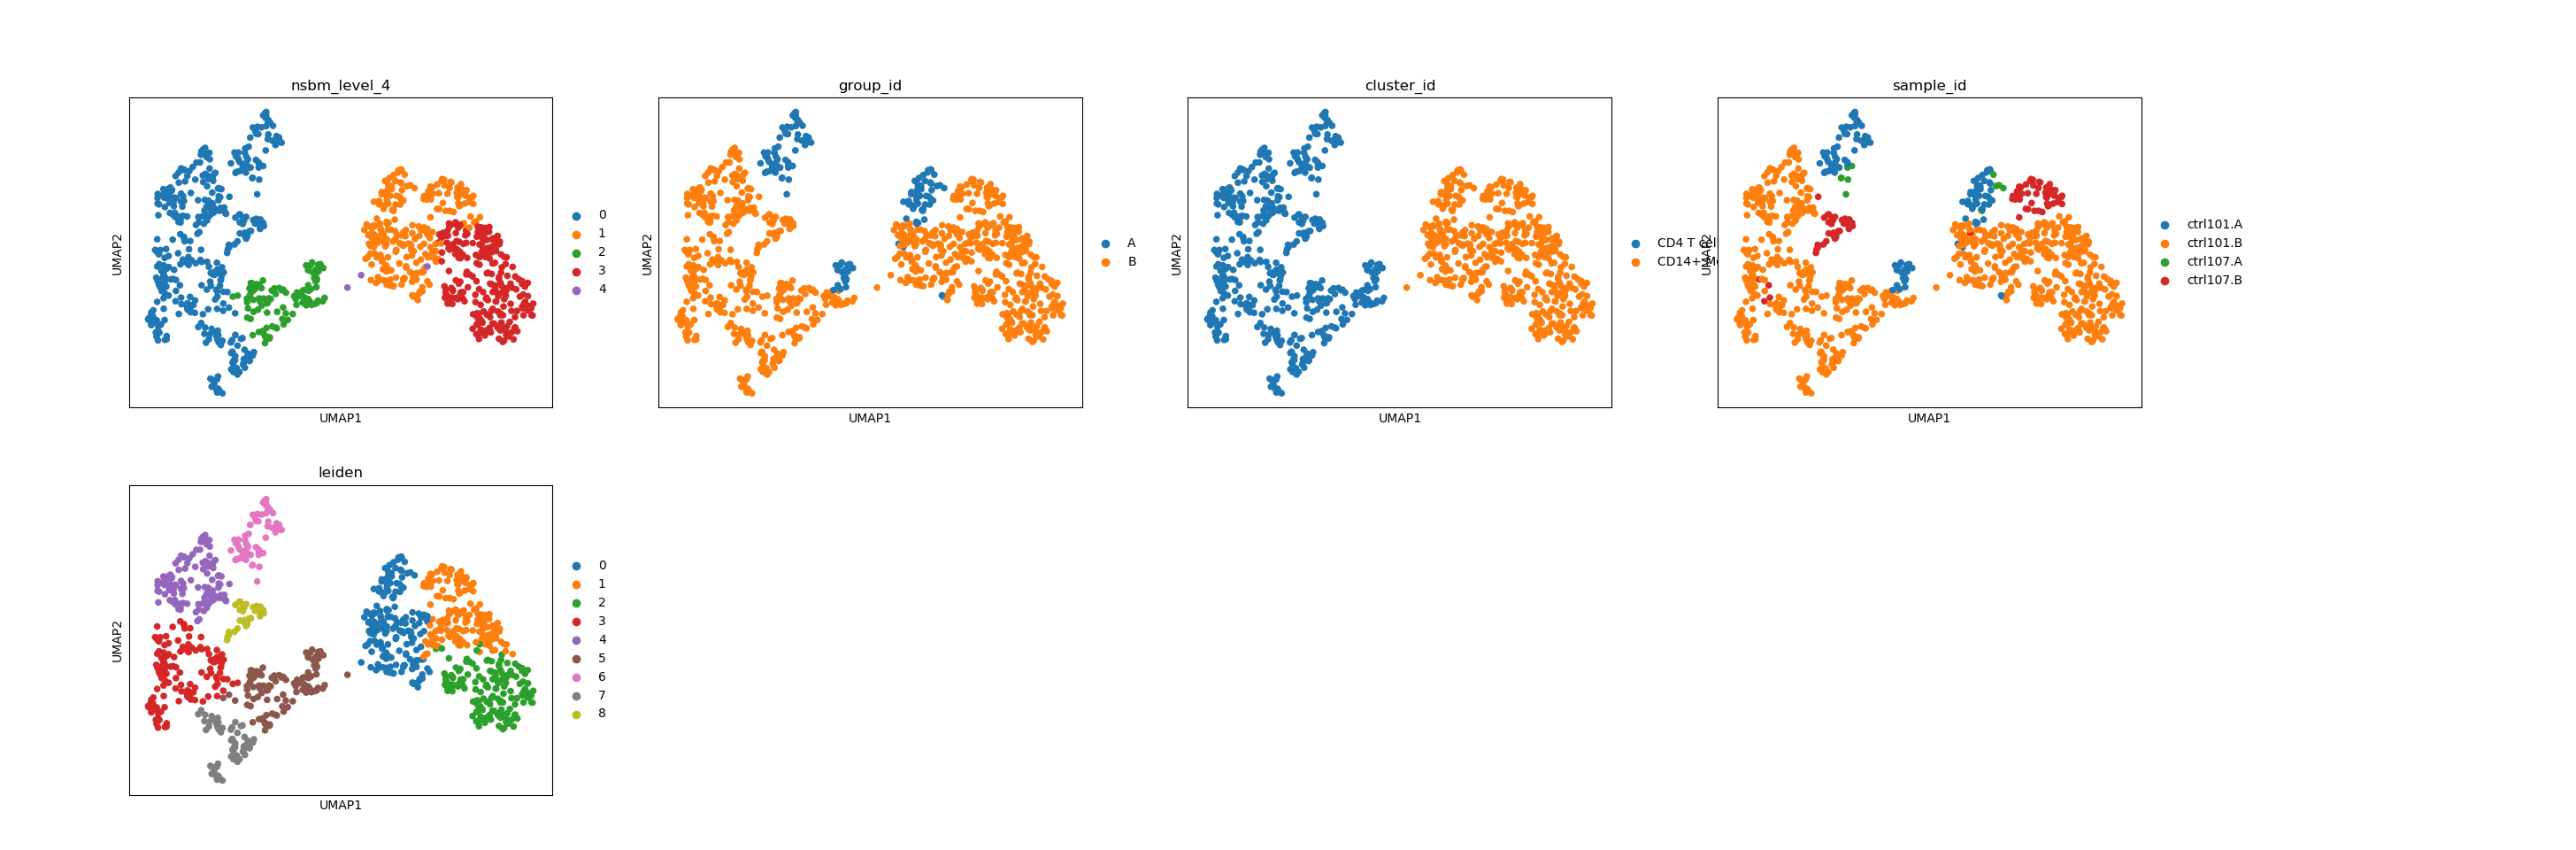

<IPython.core.display.Javascript object>


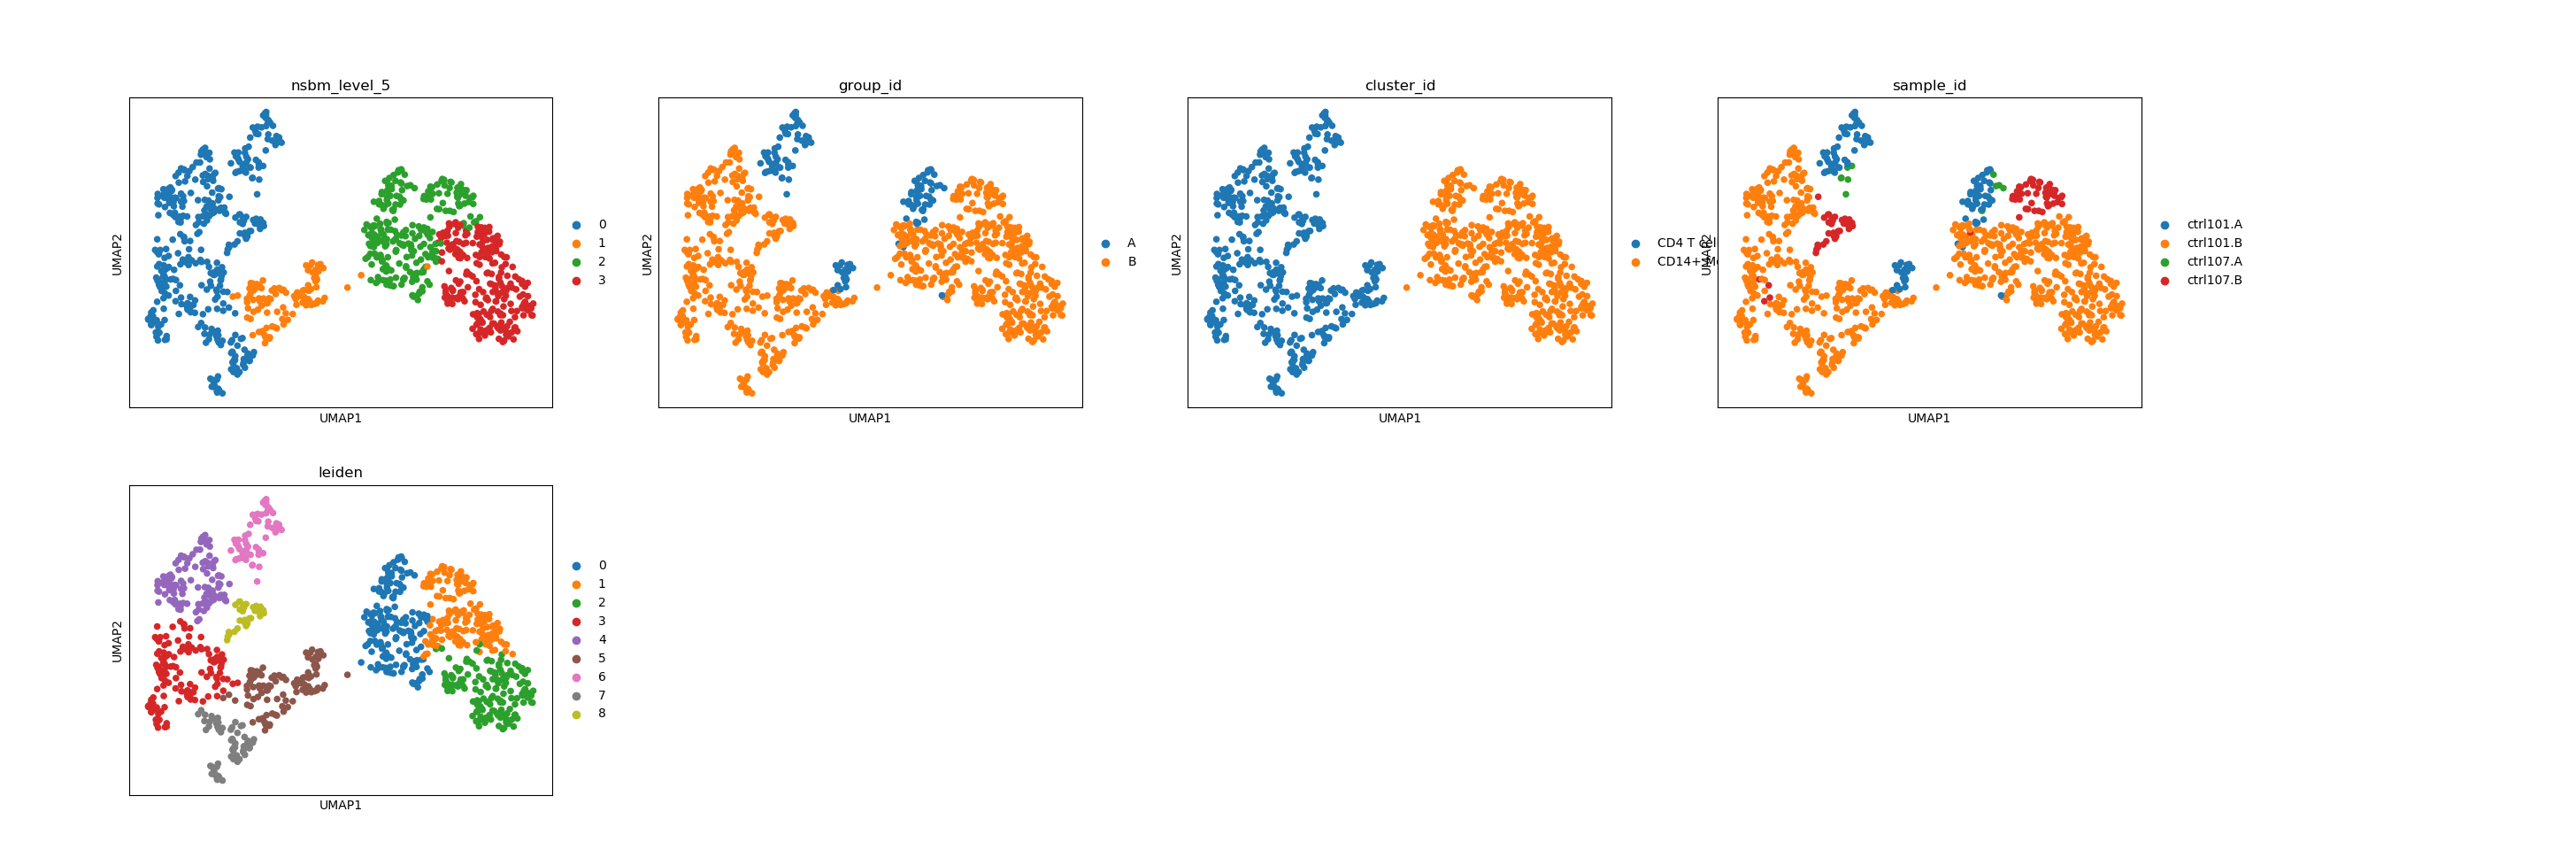

<IPython.core.display.Javascript object>


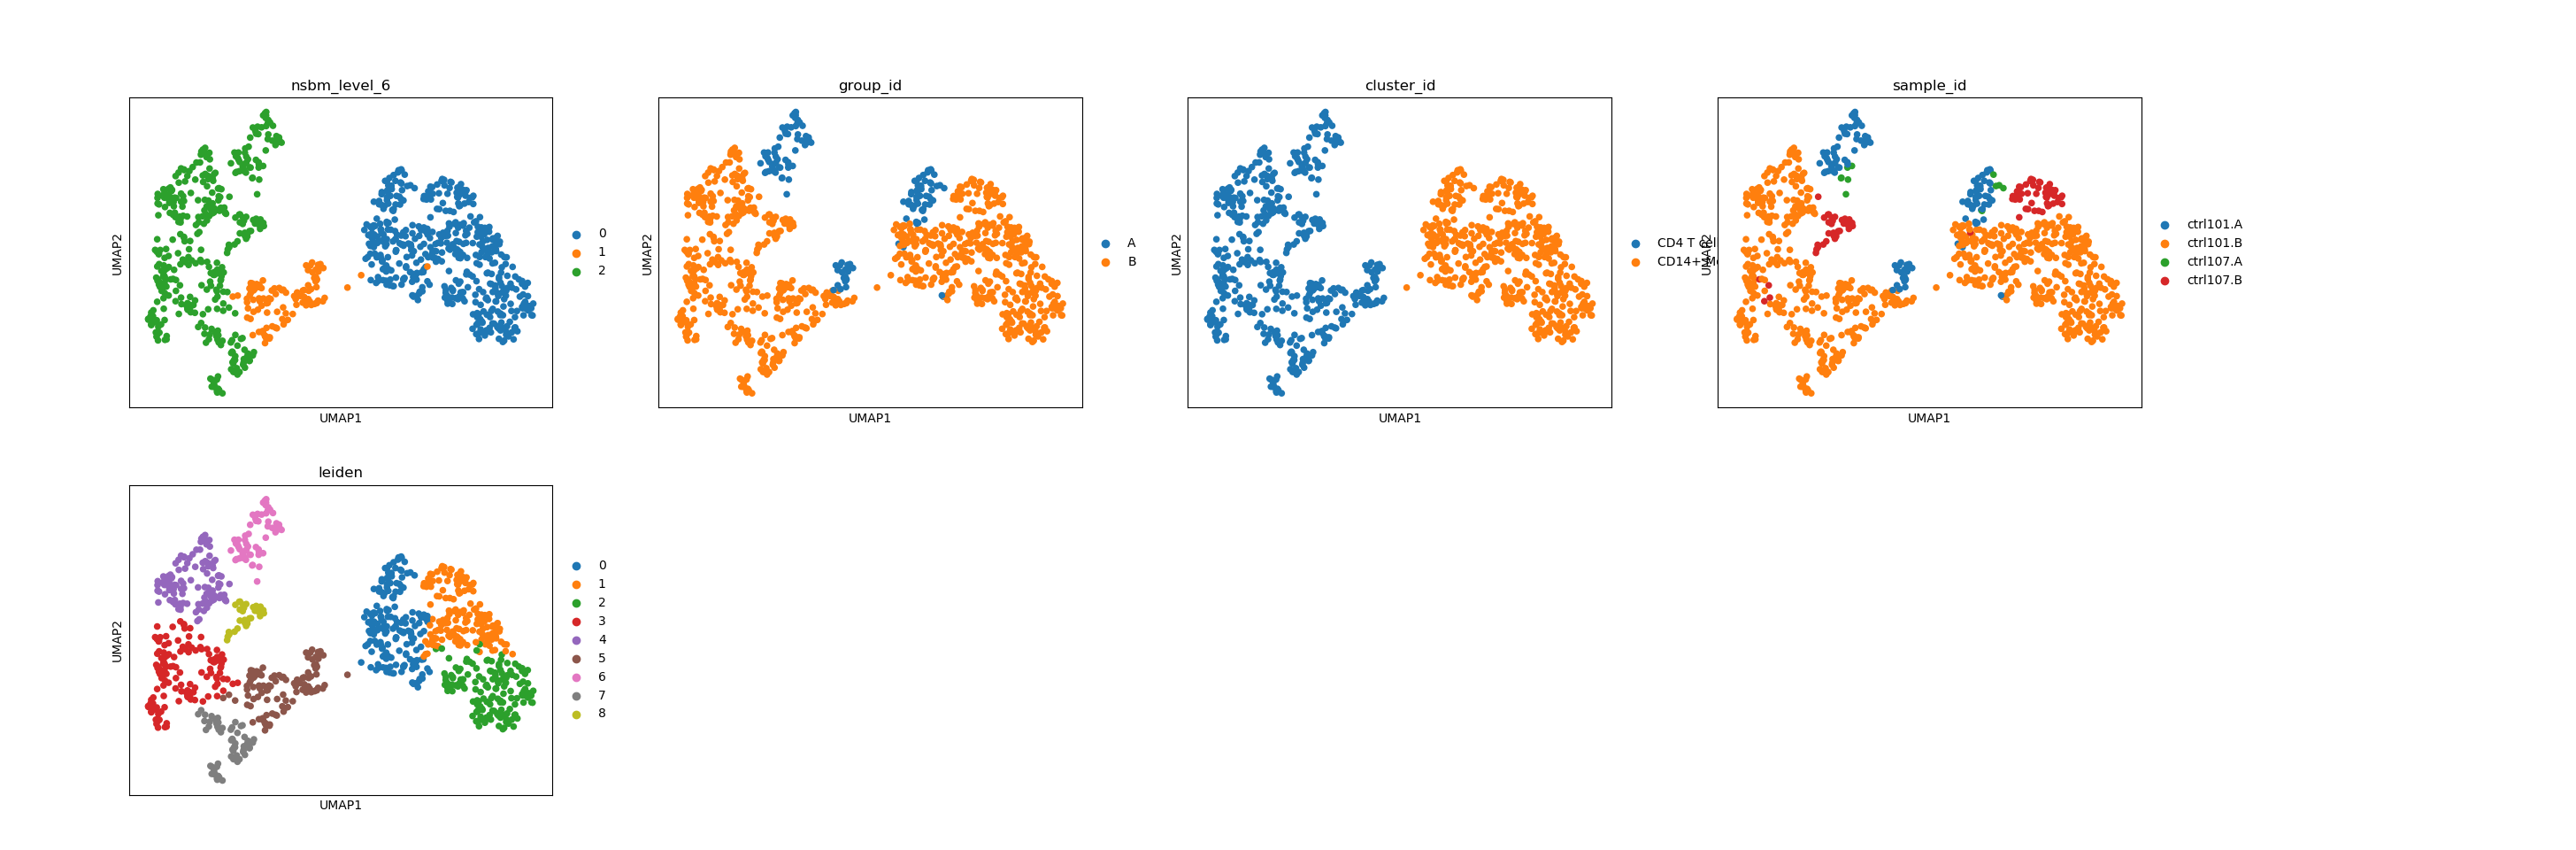

<IPython.core.display.Javascript object>


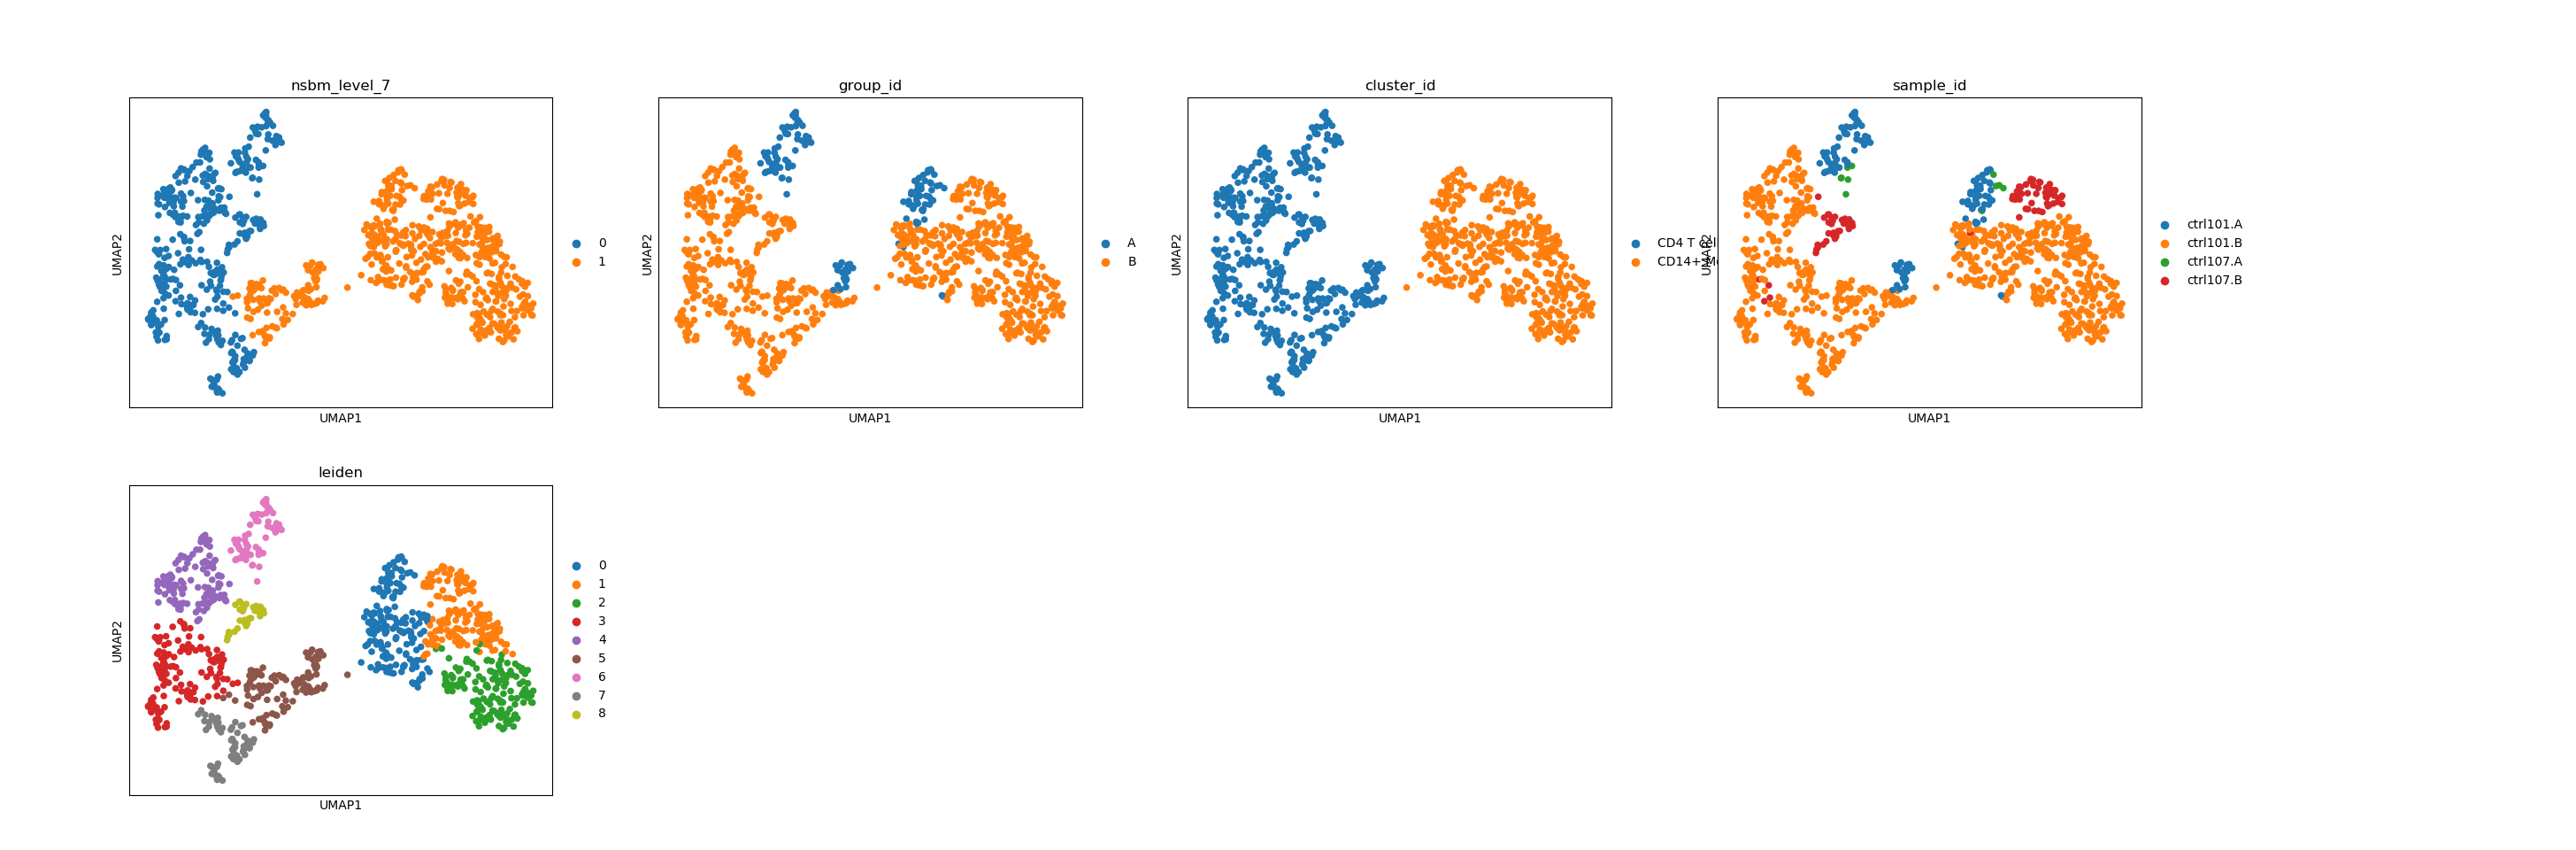

In [100]:
sc.tl.leiden(unw_adata10, resolution=0.5)
sc.tl.umap(unw_adata10)
sc.pl.umap(unw_adata10, color=["nsbm_level_1",'group_id','cluster_id','sample_id', 'leiden'])
sc.pl.umap(unw_adata10, color=["nsbm_level_2",'group_id','cluster_id','sample_id', 'leiden'])
sc.pl.umap(unw_adata10, color=["nsbm_level_3",'group_id','cluster_id','sample_id', 'leiden'])
sc.pl.umap(unw_adata10, color=["nsbm_level_4",'group_id','cluster_id','sample_id',  'leiden'])
sc.pl.umap(unw_adata10, color=["nsbm_level_5",'group_id','cluster_id','sample_id',  'leiden'])
sc.pl.umap(unw_adata10, color=["nsbm_level_6",'group_id','cluster_id','sample_id',  'leiden'])
sc.pl.umap(unw_adata10, color=["nsbm_level_7",'group_id','cluster_id','sample_id',  'leiden'])